In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

In [35]:
stock = 'FB'
start = datetime(2015, 2, 9)
end  = datetime(2021, 1, 26)

In [25]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]
sp500_constituents

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Yahoo Finance

In [5]:
yahoo = web.DataReader(stock, 'yahoo', start=start)

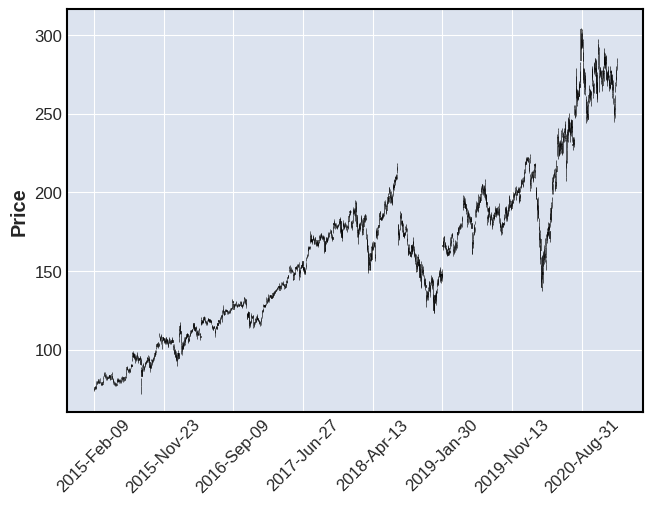

In [6]:
mpf.plot(yahoo.drop('Adj Close', axis=1), type='candle')

In [7]:
IEX_API_KEY=os.getenv('IEX_API_KEY')

In [34]:
start = datetime(2015, 2, 9)
iex = web.DataReader(stock, 'iex', start=start, api_key='pk_18ae509320394d67ad75abeea3f8895a')

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=AAPL&types=chart&range=max&token=pk_18ae509320394d67ad75abeea3f8895a
Response Text:
b'You have exceeded your allotted message quota. Please enable pay-as-you-go to regain access'

In [18]:
iex.tail()

,open,high,low,close,volume
date,,,,,
2021-01-20,268.9300,270.32,263.6000,267.48,25199919
2021-01-21,269.2600,273.60,267.4901,272.87,20838687
2021-01-22,272.0100,278.47,272.0000,274.50,21954042
2021-01-25,278.1400,280.10,271.5100,278.01,19086990
2021-01-26,278.1398,285.39,277.8100,282.05,19373636


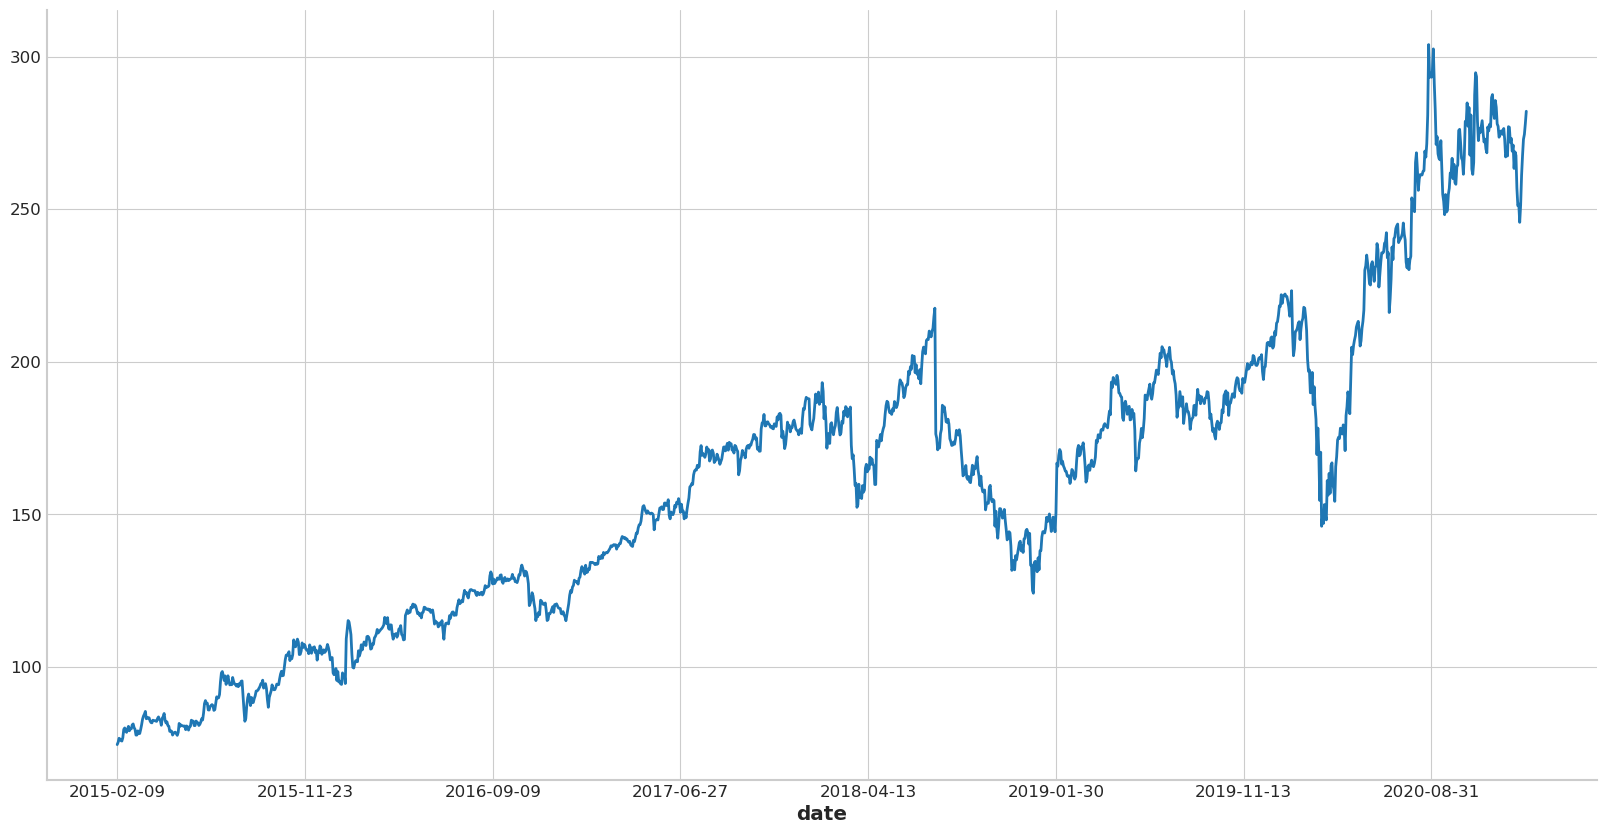

In [21]:
sns.set_style('whitegrid')
iex.close.plot(figsize=(20, 10))
sns.despine()

### Данные книги ордеров

В дополнение к историческим данным, IEX предоставляет данные о глубине книги ордеров, предоставляющих информацию о размере ордера и направлении открытия в режиме реального времени.

Работает в только в рабоч


In [36]:
book = web.get_iex_book(stock)

In [39]:
orders = pd.DataFrame(book['trades'])
orders

,price,size,tradeId,isISO,isOddLot,isOutsideRegularHours,isSinglePriceCross,isTradeThroughExempt,timestamp
0,282.075,10,2119849073,False,True,False,False,False,1611694797003
1,282.075,86,2119848805,False,True,False,False,False,1611694797003
2,282.100,1,2119818071,True,True,False,False,False,1611694796870
3,282.080,14,2119723788,False,True,False,False,False,1611694796593
4,281.940,100,2117334620,True,False,False,False,False,1611694790299
5,281.980,40,2117170296,True,True,False,False,False,1611694790132
6,281.990,81,2117146827,True,True,False,False,False,1611694790117
7,281.930,100,2117128456,True,False,False,False,False,1611694790107
8,281.900,71,2116797986,False,True,False,False,False,1611694789311
9,281.900,100,2116720613,True,False,False,False,False,1611694789082


### Quandl

In [45]:
symbol = f'{stock}.US'
quandl = web.DataReader(symbol,'quandl', start=start, api_key='J778DgZyWjAXixTppxys')
quandl

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-13,76.46,76.48,75.50,75.74,18621860.0,0.0,1.0,76.46,76.48,75.50,75.74,18621860.0
2015-02-12,76.86,76.87,75.89,76.23,17234976.0,0.0,1.0,76.86,76.87,75.89,76.23,17234976.0
2015-02-11,75.09,76.75,75.03,76.51,20877427.0,0.0,1.0,75.09,76.75,75.03,76.51,20877427.0


### NASDAQ Symbols

In [47]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,P,,True,100.0,False,NaN,AAAU,AAAU,False
AACG,True,ATA Creativity Global - American Depositary Sh...,Q,G,False,100.0,False,N,NaN,AACG,False
...,...,...,...,...,...,...,...,...,...,...,...
ZXYZ.A,True,Nasdaq Symbology Test Common Stock,Q,Q,False,100.0,True,N,NaN,ZXYZ.A,False
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZYME,True,Zymeworks Inc. Common Shares,N,,False,100.0,False,NaN,ZYME,ZYME,False
